In [1]:
#!pip install cartopy

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, 
                 getvar, 
                 smooth2d, 
                 get_cartopy, 
                 cartopy_xlim,
                 cartopy_ylim, 
                 latlon_coords)

In [3]:
# Ruta para la carga del archivo NetCDF
#ncfile = Dataset('/home/magnus/ARW/Outputs/wrfout_d01_2024-07-22_00:00:00')
ncfile = Dataset('/home/magnus/ARW/Outputs/wrfout_d02_2024-07-22_00:00:00')

In [4]:
# Get the sea level pressure
slp = getvar(ncfile, "slp",timeidx=0)

# Convertir SLP de hPa (hectopascales) a atm (atmosferas) de presion
#slp = slp/1013.25

In [5]:
# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=2)

In [6]:
# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

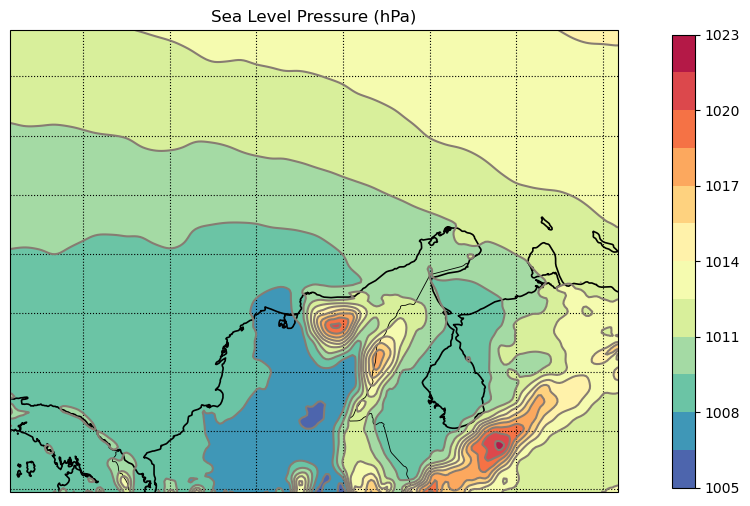

In [7]:
# Create a figure
fig = plt.figure(figsize=(14,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="10m",
                             facecolor="none",
                             name="admin_0_boundary_lines_land")

ax.add_feature(states, linewidth=0.6, edgecolor="black")
ax.coastlines('10m', linewidth=1.2)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(lons.to_numpy(),       
            lats.to_numpy(), 
            smooth_slp.to_numpy(), 
            10,
            colors='#877C72',
            transform=crs.PlateCarree())

plt.contourf(lons.to_numpy(),       
             lats.to_numpy(), 
             smooth_slp.to_numpy(),  
             10,
             cmap = plt.colormaps.get_cmap('Spectral_r'),
             transform=crs.PlateCarree())

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

plt.title("Sea Level Pressure (hPa)")
plt.savefig("slp.pdf",bbox_inches='tight', pad_inches=0)
plt.show()
